# Maze generator and A* solver example
This notebook demonstrates generating a maze, solving it with A*, printing an ASCII version, and saving two images (with and without the path).

In [6]:
# Import the package and helpers
import sys
from pathlib import Path
# Ensure project root is on sys.path for imports
repo_root = Path('..').resolve()
sys.path.insert(0, str(repo_root))
from src.simple_maze import generate_maze, astar, grid_to_ascii, save_images, find_valid_cell, make_unsolvable, make_multiple_solutions
print('Imports OK')

Imports OK


In [7]:
# Generate and solve a maze
rows, cols = 12, 20
grid = generate_maze(rows, cols, seed=41)
start = find_valid_cell(grid, seed=42)
end = find_valid_cell(grid, exclude={start}, seed=99)
path = astar(grid, start, end)
print('Path found:', path is not None)
print('ASCII representation:')
print(grid_to_ascii(grid, path, start, end, start_sym='@', end_sym='#', path_sym='*', walkable_sym='.'))

Path found: True
ASCII representation:
█████████████████████████████████████████
█...█...█...........█.....█...█.........█
███.█.█.███.███████.█.███.█.█.█.███████.█
█.█...█.█...█.......█.█.....█.█...█...█.█
█.█████.█.█████.█████.█.█.███████.█.█.█.█
█***..█.█.....█.....█.█.█.█.......█.█...█
█*█*███.█████.█████.█.█.███.███████.███.█
█*█*█...█.....█.█...█.█.█...█...█...█.█.█
█*█*█.███.█████.█.███.█.█.███.█.█.███.█.█
█*█*█...█.█.......█...█...█...█.█.█.....█
█*█*███.█.█████████.█.███████.███.█.█████
█*█*#.█.█.█.....█...█.........█...█.█...█
█*███.█.█.█.█.███.█████████████.███.█.█.█
█***█.█.█...█.█...█.....█.......█...█.█.█
███*█.█.█.███.█.███.███.█.█.███████.█.█.█
█***█...█...█.....█.█...█.█.█.....█.█.█.█
█*█████████████████.█.███.███.███.█.█.█.█
█*█.█*@...█.........█.█.......█.█.█...█.█
█*█.█*███.█.█████.███.███████.█.█.█████.█
█*****█...█...█...█.█...█...█...█...█...█
███████.███████.███.███.█.█.█.█████.███.█
█.....█.........█...█.█.█.█.█.█...█...█.█
█.███.███████████.█.█.█.█.█.███.█.███

Saved: maze_example_out.png maze_example_out_path.png


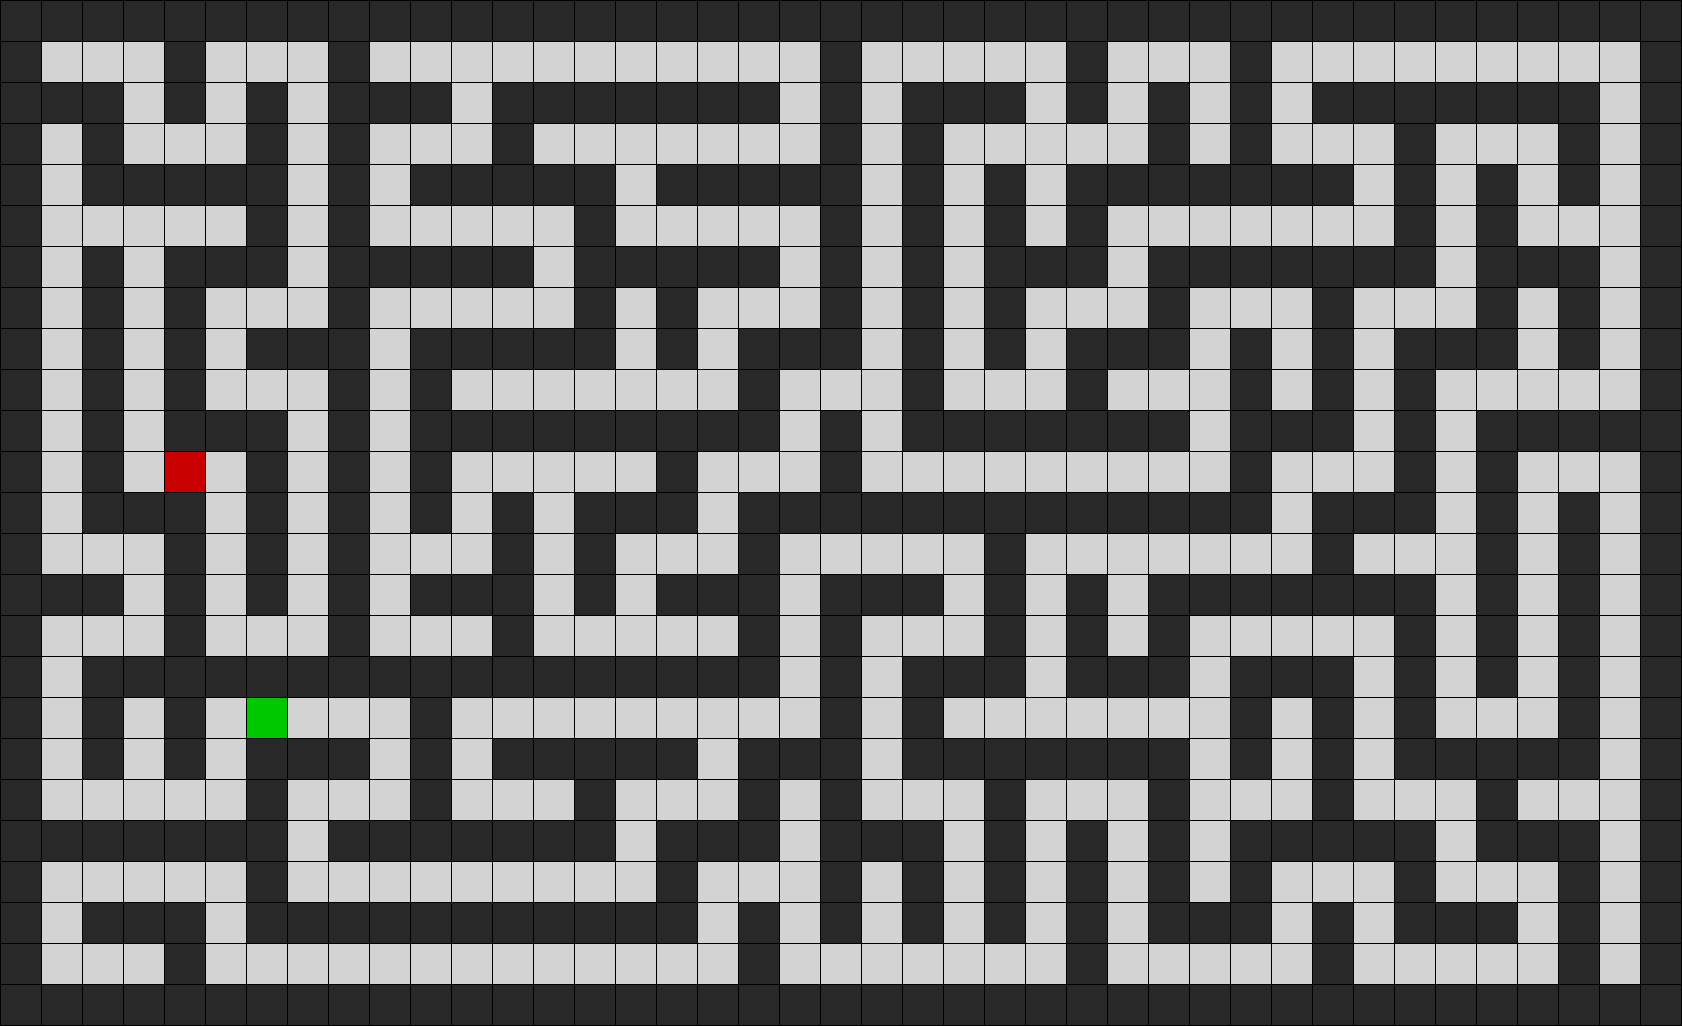

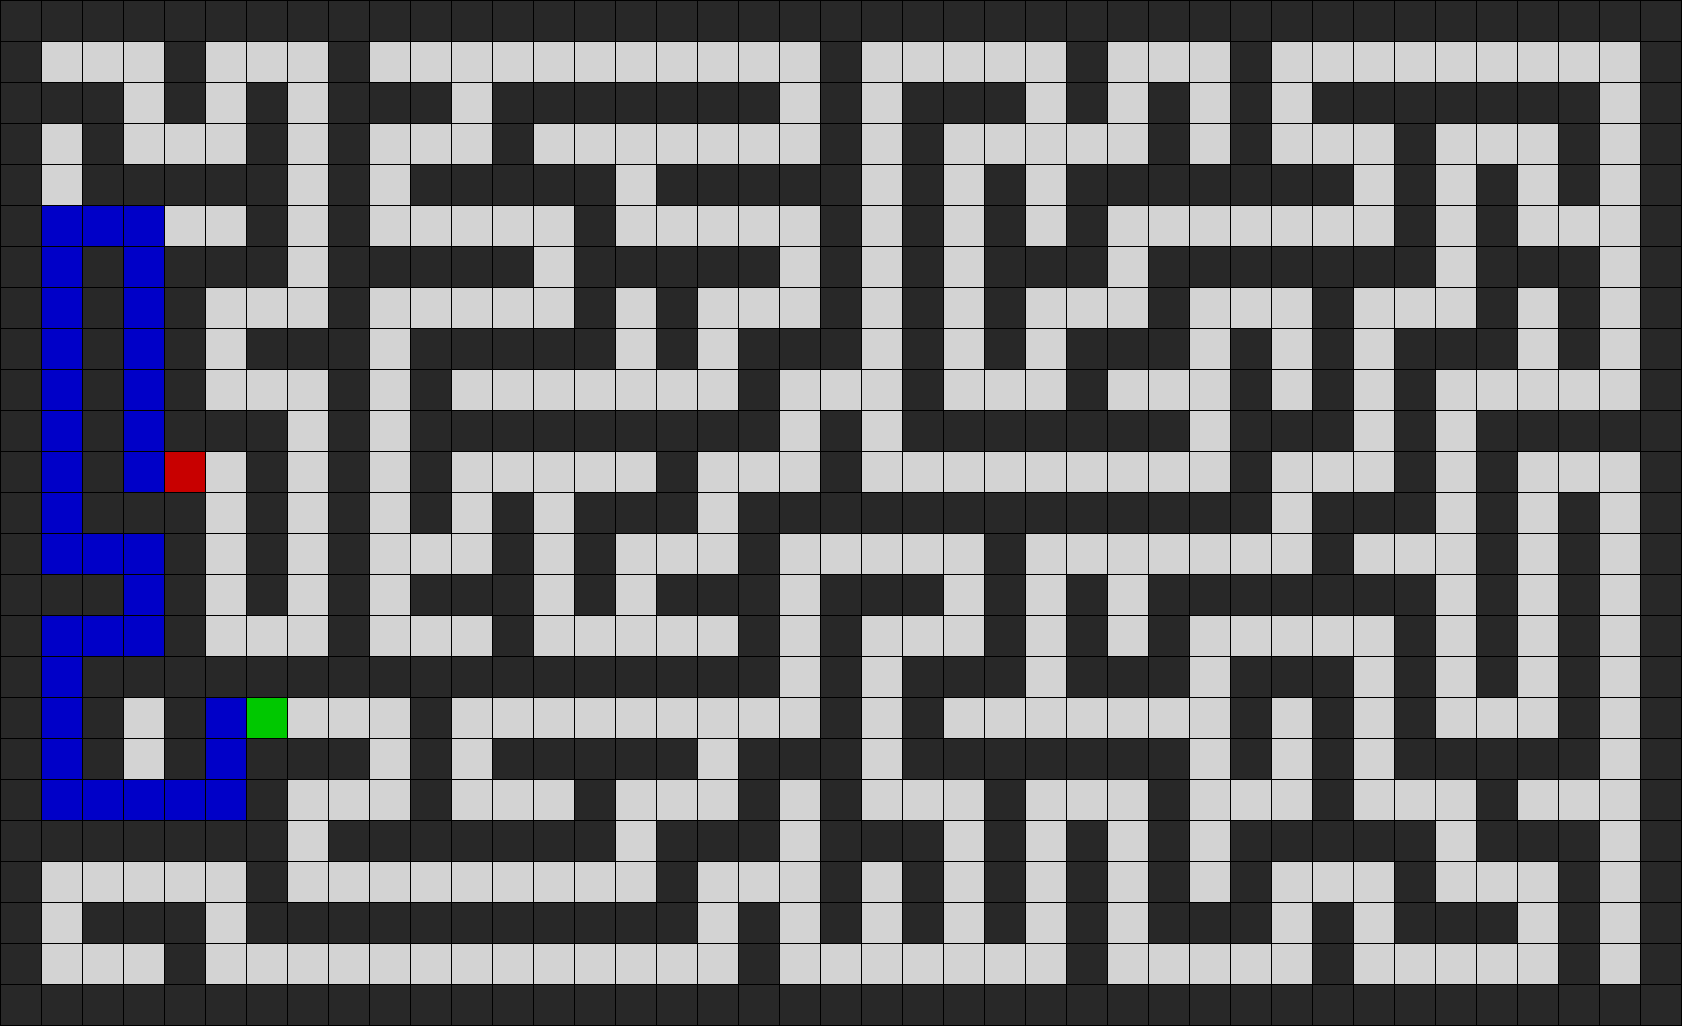

In [8]:
# Save images and display them inline
from IPython.display import display
from PIL import Image
fn_no, fn_yes = save_images(grid, path, start, end, cell_size=40, out_prefix='maze_example_out')
print('Saved:', fn_no, fn_yes)
display(Image.open(fn_no))
display(Image.open(fn_yes))

## Unsolvable maze
In this section we make a copy of the generated maze and modify it so that there is no path between the chosen start and end.

Made unsolvable: True
Path exists after modification: False
ASCII:
█████████████████████████████████████████
█...█...█...........█.....█...█.........█
███.█.█.███.███████.█.███.█.█.█.███████.█
█.█...█.█...█.......█.█.....█.█...█...█.█
█.█████.█.█████.█████.█.█.███████.█.█.█.█
█.....█.█.....█.....█.█.█.█.......█.█...█
█.█.███.█████.█████.█.█.███.███████.███.█
█.█.█...█.....█.█...█.█.█...█...█...█.█.█
█.█.█.███.█████.█.███.█.█.███.█.█.███.█.█
█.█.█...█.█.......█...█...█...█.█.█.....█
█.█.███.█.█████████.█.███████.███.█.█████
█.█.#.█.█.█.....█...█.........█...█.█...█
█.███.█.█.█.█.███.█████████████.███.█.█.█
█...█.█.█...█.█...█.....█.......█...█.█.█
███.█.█.█.███.█.███.███.█.█.███████.█.█.█
█...█...█...█.....█.█...█.█.█.....█.█.█.█
█.█████████████████.█.███.███.███.█.█.█.█
█.█.█.@...█.........█.█.......█.█.█...█.█
███.█.███.█.█████.███.███████.█.█.█████.█
█.....█...█...█...█.█...█...█...█...█...█
███████.███████.███.███.█.█.█.█████.███.█
█.....█.........█...█.█.█.█.█.█...█...█.█
█.███.███

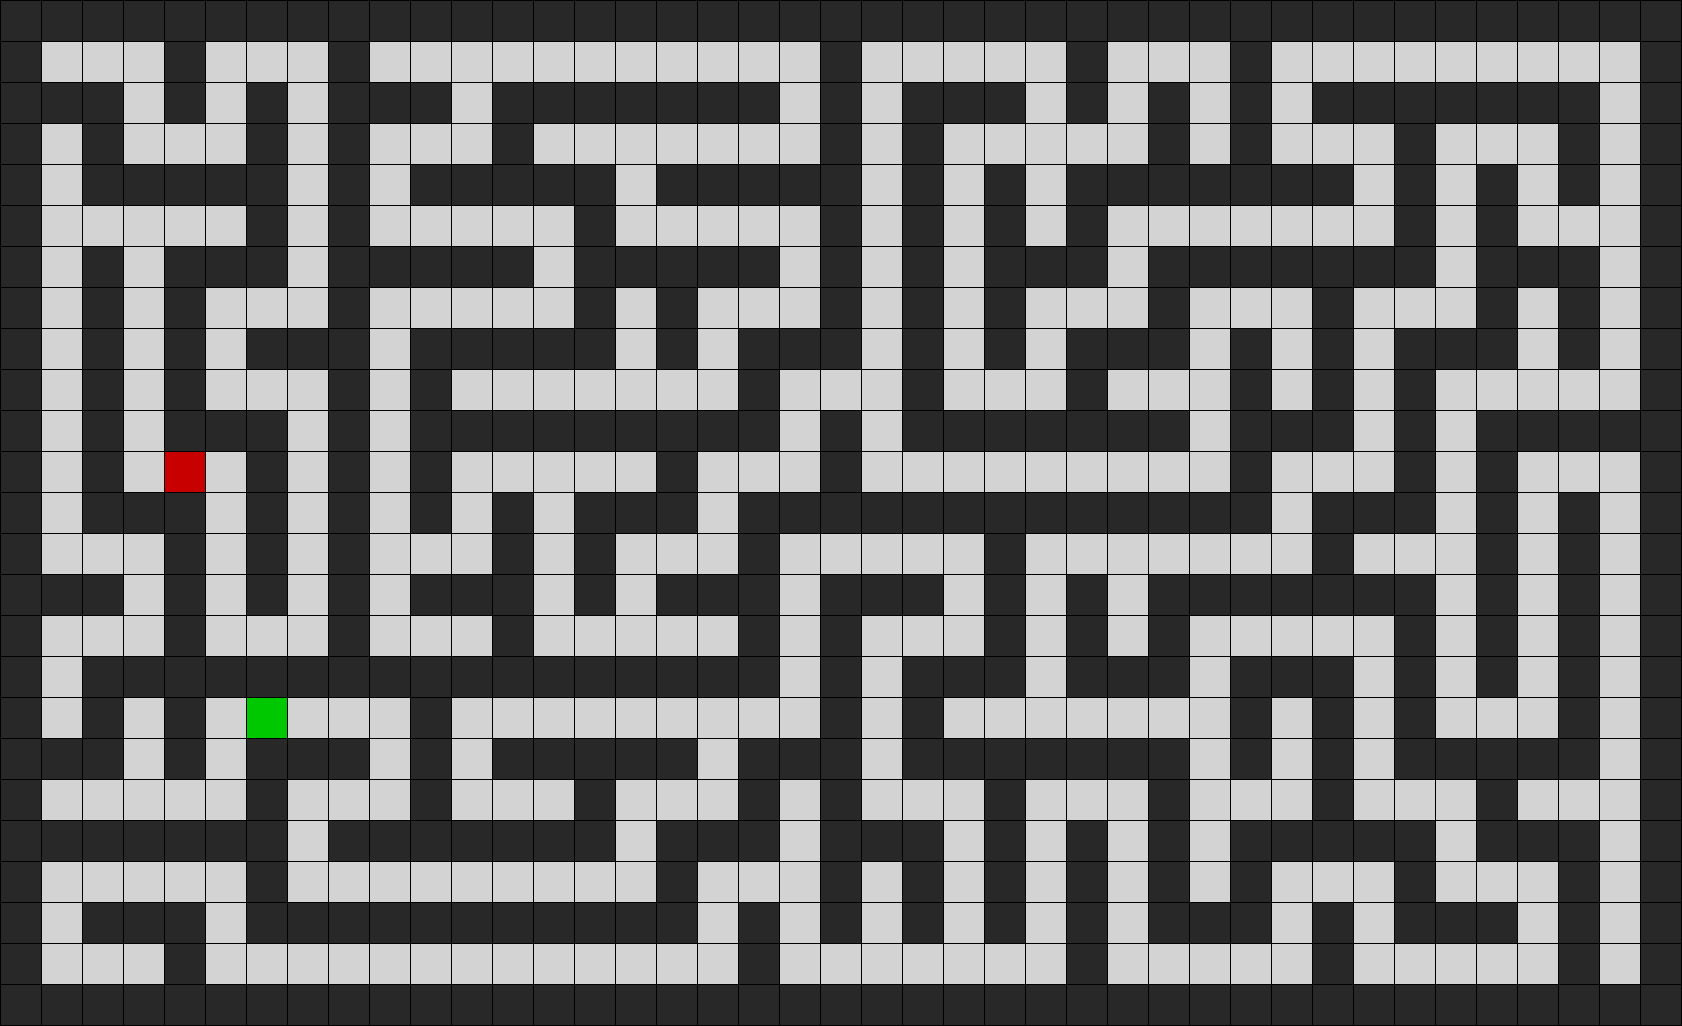

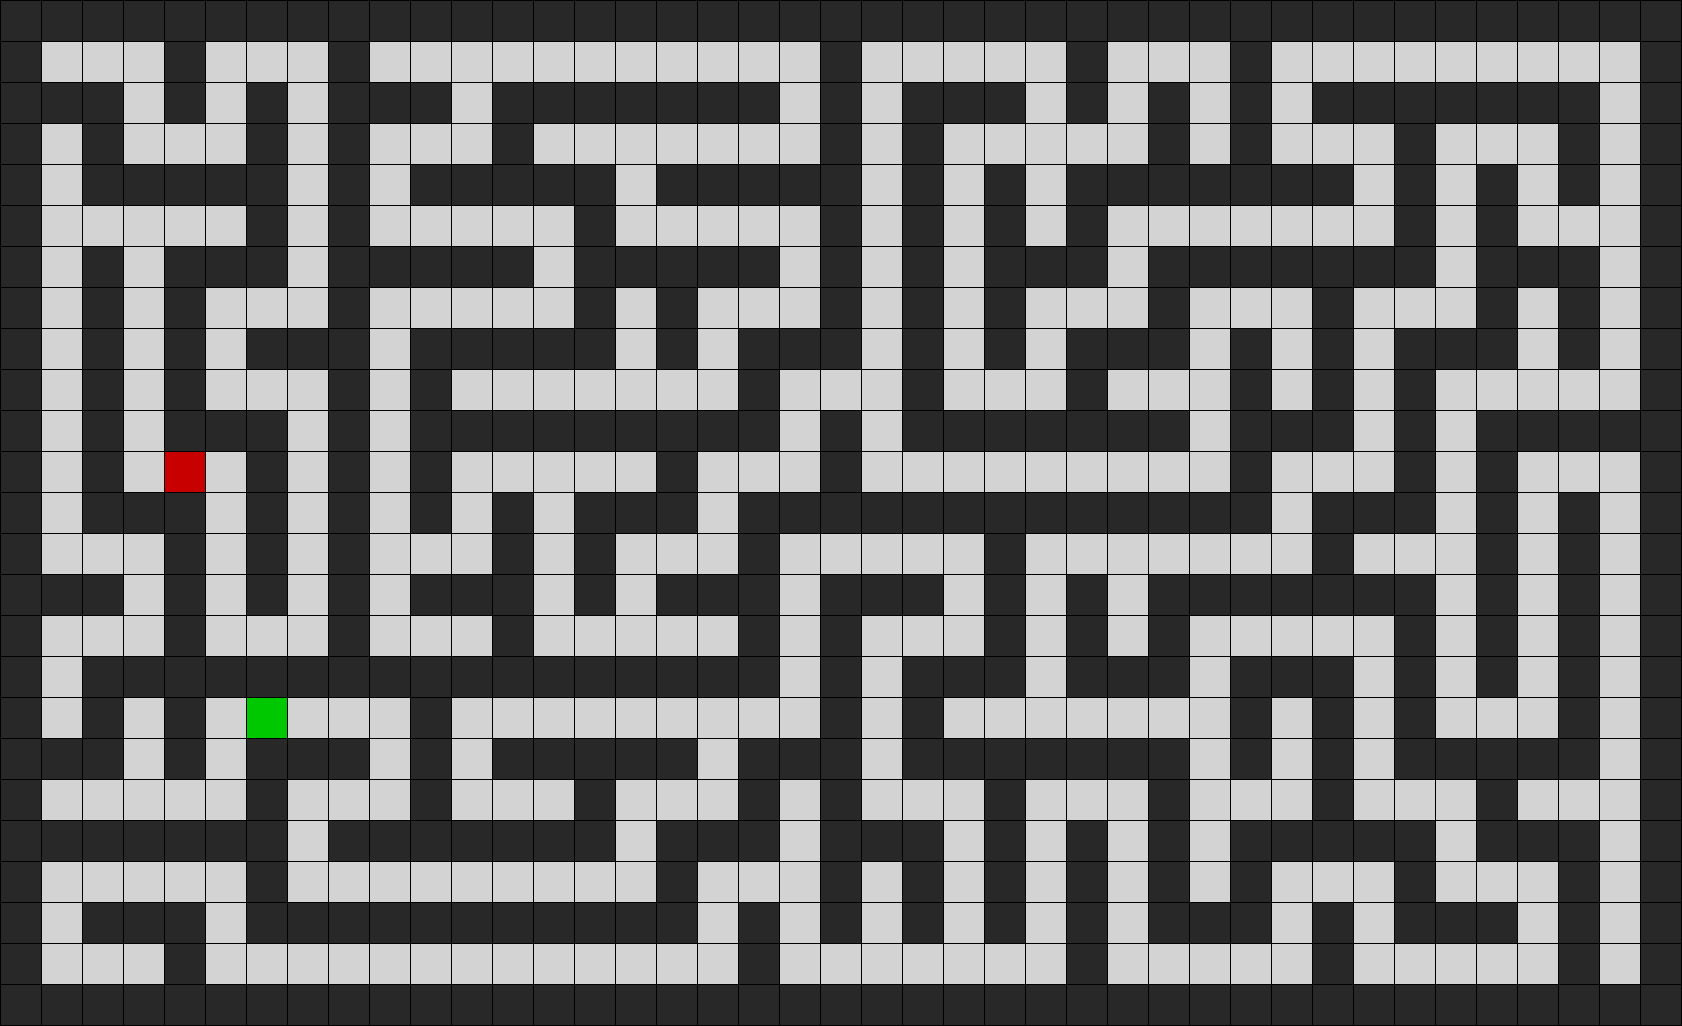

In [9]:
# Create an unsolvable variant by blocking part of the path
import copy
g_uns = copy.deepcopy(grid)
made_uns = make_unsolvable(g_uns, start, end, astar, seed=123)
print('Made unsolvable:', made_uns)
print('Path exists after modification:', astar(g_uns, start, end) is not None)
print('ASCII:')
print(grid_to_ascii(g_uns, astar(g_uns, start, end), start, end, start_sym='@', end_sym='#', path_sym='*', walkable_sym='.'))
fn_no, fn_yes = save_images(g_uns, None, start, end, cell_size=40, out_prefix='maze_unsolvable')
print('Saved:', fn_no, fn_yes)
from IPython.display import display
from PIL import Image
display(Image.open(fn_no))
display(Image.open(fn_yes))

## Multiple-solution maze
In this section we attempt to create an alternate route between start and end by removing suitable walls.

Made multiple solutions: True
Original path length: 35
New path length: 23
ASCII:
█████████████████████████████████████████
█...█...█...........█.....█...█.........█
███.█.█.███.███████.█.███.█.█.█.███████.█
█.█...█.█...█.......█.█.....█.█...█...█.█
█.█████.█.█████.█████.█.█.███████.█.█.█.█
█.....█.█.....█.....█.█.█.█.......█.█...█
█.█.███.█████.█████.█.█.███.███████.███.█
█.█.█...█.....█.█...█.█.█...█...█...█.█.█
█.█.█.███.█████.█.███.█.█.███.█.█.███.█.█
█.█.█...█.█.......█...█...█...█.█.█.....█
█.█.███.█.█████████.█.███████.███.█.█████
█***#.█.█.█.....█...█.........█...█.█...█
█*███.█.█.█.█.███.█████████████.███.█.█.█
█***█.█.█...█.█...█.....█.......█...█.█.█
███*█.█.█.███.█.███.███.█.█.███████.█.█.█
█***█...█...█.....█.█...█.█.█.....█.█.█.█
█*█████████████████.█.███.███.███.█.█.█.█
█*█.█*@...█.........█.█.......█.█.█...█.█
█*█.█*███.█.█████.███.███████.█.█.█████.█
█*****█...█...█...█.█...█...█...█...█...█
███████.███████.███.███.█.█.█.█████.███.█
█.....█.........█...█.█.█.█.█.█...█.

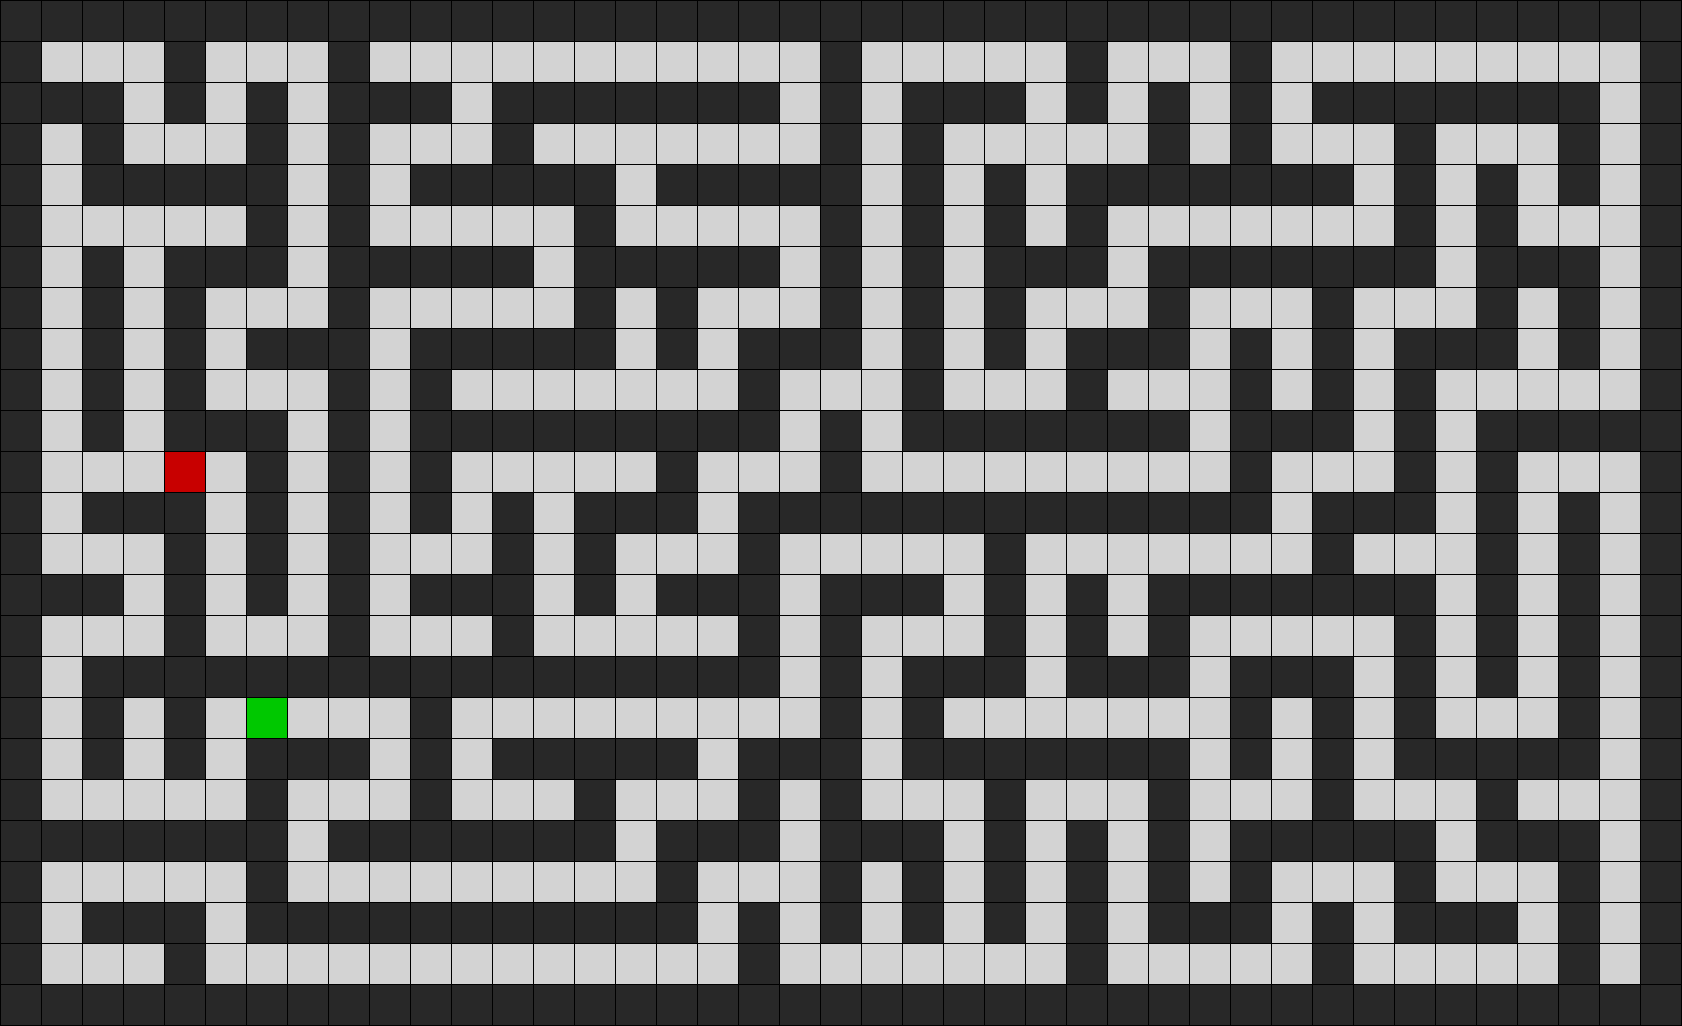

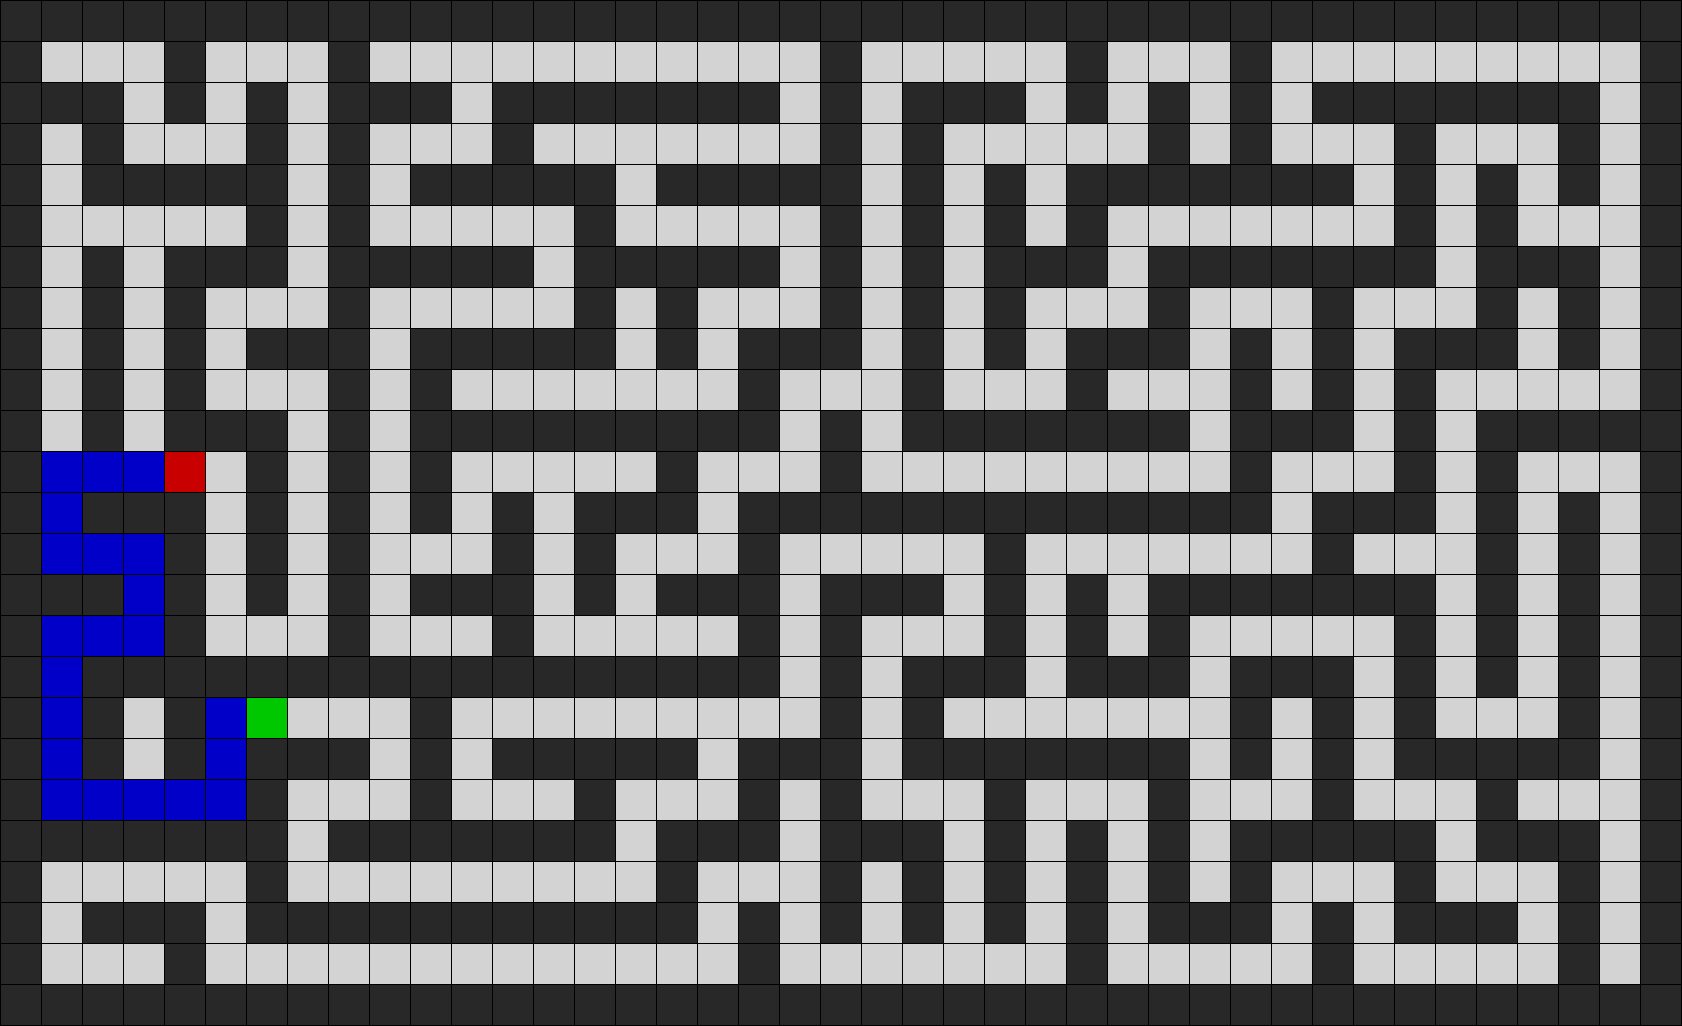

In [10]:
# Create a variant with multiple solutions
import copy
g_multi = copy.deepcopy(grid)
made_multi = make_multiple_solutions(g_multi, start, end, astar, seed=456)
print('Made multiple solutions:', made_multi)
print('Original path length:', len(path) if path else None)
new_path = astar(g_multi, start, end)
print('New path length:', len(new_path) if new_path else None)
print('ASCII:')
print(grid_to_ascii(g_multi, new_path, start, end, start_sym='@', end_sym='#', path_sym='*', walkable_sym='.'))
fn_no, fn_yes = save_images(g_multi, new_path, start, end, cell_size=40, out_prefix='maze_multiple')
print('Saved:', fn_no, fn_yes)
from IPython.display import display
from PIL import Image
display(Image.open(fn_no))
display(Image.open(fn_yes))